In [41]:
!pip install spacy

In [42]:
!pip install wordcloud

In [43]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [44]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 39.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


#### 1. Data Exploration and Preprocessing

In [46]:
df=pd.read_csv("/content/blogs.csv")

In [47]:
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [48]:
df.duplicated().sum()

0

In [49]:
df.isnull().sum()

,0
Data,0
Labels,0


In [50]:
df['len']=df['Data'].apply(len)

array([[<Axes: title={'center': 'alt.atheism'}>,
        <Axes: title={'center': 'comp.graphics'}>,
        <Axes: title={'center': 'comp.os.ms-windows.misc'}>,
        <Axes: title={'center': 'comp.sys.ibm.pc.hardware'}>],
       [<Axes: title={'center': 'comp.sys.mac.hardware'}>,
        <Axes: title={'center': 'comp.windows.x'}>,
        <Axes: title={'center': 'misc.forsale'}>,
        <Axes: title={'center': 'rec.autos'}>],
       [<Axes: title={'center': 'rec.motorcycles'}>,
        <Axes: title={'center': 'rec.sport.baseball'}>,
        <Axes: title={'center': 'rec.sport.hockey'}>,
        <Axes: title={'center': 'sci.crypt'}>],
       [<Axes: title={'center': 'sci.electronics'}>,
        <Axes: title={'center': 'sci.med'}>,
        <Axes: title={'center': 'sci.space'}>,
        <Axes: title={'center': 'soc.religion.christian'}>],
       [<Axes: title={'center': 'talk.politics.guns'}>,
        <Axes: title={'center': 'talk.politics.mideast'}>,
        <Axes: title={'center': 'ta

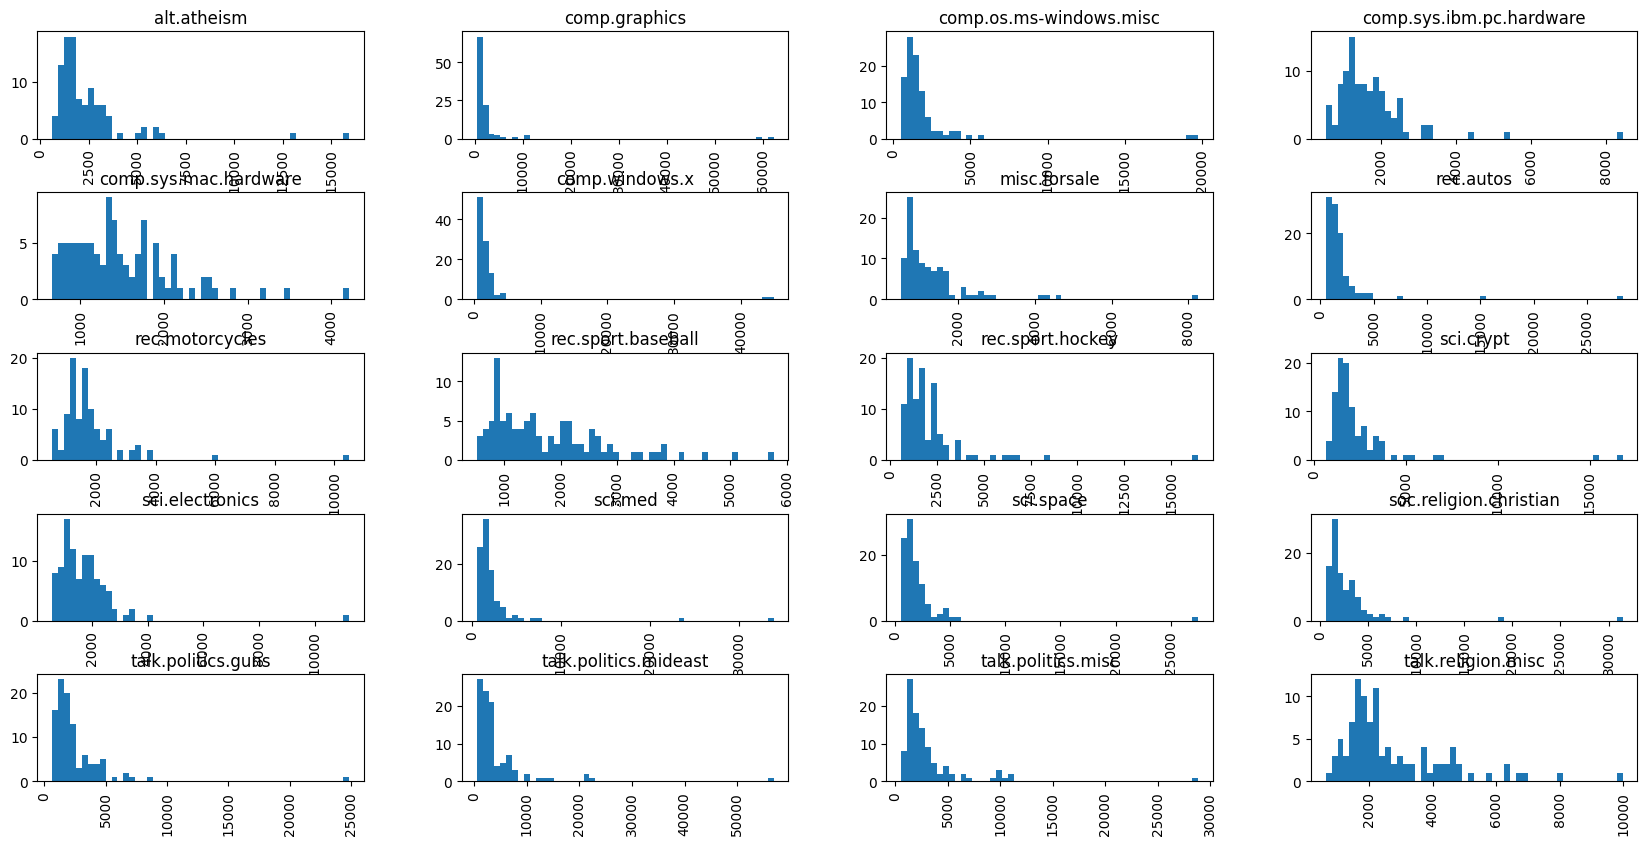

In [51]:
df.hist('len' ,by='Labels',bins=50,figsize=(20,10))

In [52]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [53]:
nltk.download('stopwords')
nltk.download('punkt')
# Define a preprocessing function
def clean_words(text):
    text = re.sub(r'[^\w\s]', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [54]:
df['Cleaned_Text']=df['Data'].apply(clean_words)
df['Cleaned_label']=df['Labels'].apply(clean_words)

In [55]:
df

,Data,Labels,len,Cleaned_Text,Cleaned_label
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,5972,path cantaloupe srv cs cmu edu magnesium club ...,alt atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,1336,newsgroups alt atheism path cantaloupe srv cs ...,alt atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,3116,path cantaloupe srv cs cmu edu das news harvar...,alt atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,15910,path cantaloupe srv cs cmu edu magnesium club ...,alt atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,3264,xref cantaloupe srv cs cmu edu alt atheism 534...,alt atheism
...,...,...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,5263,xref cantaloupe srv cs cmu edu talk abortion 1...,talk religion misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,1771,xref cantaloupe srv cs cmu edu talk religion m...,talk religion misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,2192,xref cantaloupe srv cs cmu edu talk origins 41...,talk religion misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,3197,xref cantaloupe srv cs cmu edu talk religion m...,talk religion misc


In [56]:
df[df['Cleaned_label']=='sci med']

,Data,Labels,len,Cleaned_Text,Cleaned_label
1300,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,sci.med,817,path cantaloupe srv cs cmu edu magnesium club ...,sci med
1301,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,sci.med,534,path cantaloupe srv cs cmu edu das news harvar...,sci med
1302,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,sci.med,689,path cantaloupe srv cs cmu edu das news harvar...,sci med
1303,Xref: cantaloupe.srv.cs.cmu.edu sci.med:58963 ...,sci.med,3221,xref cantaloupe srv cs cmu edu sci med 58963 s...,sci med
1304,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,sci.med,1270,path cantaloupe srv cs cmu edu das news harvar...,sci med
...,...,...,...,...,...
1395,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,sci.med,4660,path cantaloupe srv cs cmu edu magnesium club ...,sci med
1396,Xref: cantaloupe.srv.cs.cmu.edu sci.energy:157...,sci.med,1117,xref cantaloupe srv cs cmu edu sci energy 1579...,sci med
1397,Xref: cantaloupe.srv.cs.cmu.edu misc.health.al...,sci.med,1017,xref cantaloupe srv cs cmu edu misc health alt...,sci med
1398,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,sci.med,2379,path cantaloupe srv cs cmu edu crabapple srv c...,sci med


In [57]:
tfidf=TfidfTransformer()

In [58]:
count=CountVectorizer(analyzer=clean_words,max_features=5000)

In [59]:
x=count.fit_transform(df['Cleaned_Text'])

In [60]:
a=tfidf.fit_transform(x)

In [61]:
a.toarray()

array([[0.56874539, 0.00552273, 0.016127  , ..., 0.0117294 , 0.07232248,
        0.00432856],
       [0.60811944, 0.00390472, 0.01520299, ..., 0.02487904, 0.03815972,
        0.01530208],
       [0.59961738, 0.01169661, 0.0569257 , ..., 0.00621043, 0.05715375,
        0.00763957],
       ...,
       [0.62113156, 0.03272431, 0.04512494, ..., 0.00868765, 0.01599025,
        0.01870197],
       [0.57852247, 0.00716083, 0.01916791, ..., 0.02091165, 0.05423506,
        0.01403116],
       [0.58831589, 0.0204885 , 0.02866794, ..., 0.00543929, 0.05756556,
        0.00501822]])

### 2. Naive Bayes Model for Text Classification

In [62]:
mnb=MultinomialNB()

In [63]:
mnb.fit(a,df['Labels'])

MultinomialNB()

In [64]:
y_pred=mnb.predict(a)

In [65]:
accuracy_score(df['Labels'],y_pred)

0.2405

In [66]:
x_train,x_test,y_train,y_test=train_test_split(df['Cleaned_Text'],df['Cleaned_label'],train_size=0.8,random_state=10)

In [67]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1600,), (1600,), (400,), (400,))

In [68]:
pipeline=Pipeline([('count',CountVectorizer(analyzer=clean_words)),('tfidf',TfidfTransformer()),('multi',MultinomialNB())])

In [69]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('count',
                 CountVectorizer(analyzer=<function clean_words at 0x7b64def336d0>)),
                ('tfidf', TfidfTransformer()), ('multi', MultinomialNB())])

In [70]:
y_pred1=pipeline.predict(x_test)

In [71]:
y_pred1

array(['comp os ms windows misc', 'sci med', 'sci med', 'sci med',
       'rec sport hockey', 'sci med', 'sci med', 'rec sport hockey',
       'sci med', 'sci med', 'sci med', 'sci med', 'sci med', 'sci med',
       'sci med', 'sci med', 'sci med', 'sci med', 'sci med', 'sci med',
       'sci med', 'sci med', 'sci med', 'sci med', 'sci med', 'sci med',
       'sci med', 'sci med', 'sci med', 'sci med', 'sci med',
       'rec sport hockey', 'rec autos', 'sci med', 'sci med', 'sci med',
       'sci med', 'sci med', 'sci med', 'sci med', 'sci med', 'sci med',
       'sci med', 'sci med', 'sci med', 'sci med', 'sci med', 'sci med',
       'sci med', 'sci med', 'sci med', 'sci med', 'sci med', 'sci med',
       'sci med', 'sci med', 'sci med', 'comp os ms windows misc',
       'sci med', 'sci med', 'sci med', 'sci med', 'sci med',
       'rec sport hockey', 'sci med', 'sci med', 'sci med', 'sci med',
       'sci med', 'sci med', 'sci med', 'sci med', 'sci med', 'sci med',
       'sci med', 

In [72]:
accuracy_score(y_test,y_pred1)

0.0275

#### 3. Sentiment Analysis

In [73]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
def get_sentiment(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to each blog post
df['Sentiment'] = df['Data'].apply(get_sentiment)
print(df[['Data', 'Sentiment']].head())  # Check the sentiment analysis


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                Data Sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  negative
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  positive
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  negative
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  negative
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  positive


In [74]:
df

,Data,Labels,len,Cleaned_Text,Cleaned_label,Sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,5972,path cantaloupe srv cs cmu edu magnesium club ...,alt atheism,negative
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,1336,newsgroups alt atheism path cantaloupe srv cs ...,alt atheism,positive
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,3116,path cantaloupe srv cs cmu edu das news harvar...,alt atheism,negative
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,15910,path cantaloupe srv cs cmu edu magnesium club ...,alt atheism,negative
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,3264,xref cantaloupe srv cs cmu edu alt atheism 534...,alt atheism,positive
...,...,...,...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,5263,xref cantaloupe srv cs cmu edu talk abortion 1...,talk religion misc,positive
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,1771,xref cantaloupe srv cs cmu edu talk religion m...,talk religion misc,positive
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,2192,xref cantaloupe srv cs cmu edu talk origins 41...,talk religion misc,positive
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,3197,xref cantaloupe srv cs cmu edu talk religion m...,talk religion misc,positive


In [75]:
# Display sentiment distribution across categories
sentiment_dist = df.groupby('Labels')['Sentiment'].value_counts(normalize=True).unstack()
print(sentiment_dist)

Sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                   0.42     0.01      0.57
comp.graphics                 0.13     0.04      0.83
comp.os.ms-windows.misc       0.24     0.02      0.74
comp.sys.ibm.pc.hardware      0.21      NaN      0.79
comp.sys.mac.hardware         0.24     0.03      0.73
comp.windows.x                0.20     0.02      0.78
misc.forsale                  0.07     0.08      0.85
rec.autos                     0.27     0.01      0.72
rec.motorcycles               0.30     0.02      0.68
rec.sport.baseball            0.27     0.01      0.72
rec.sport.hockey              0.28     0.01      0.71
sci.crypt                     0.29      NaN      0.71
sci.electronics               0.18     0.04      0.78
sci.med                       0.38     0.01      0.61
sci.space                     0.32     0.03      0.65
soc.religion.christian        0.29      NaN      0.71
talk.politics.guns          

Text(0.5, 1.0, 'Sentiment Distribution across Categories')

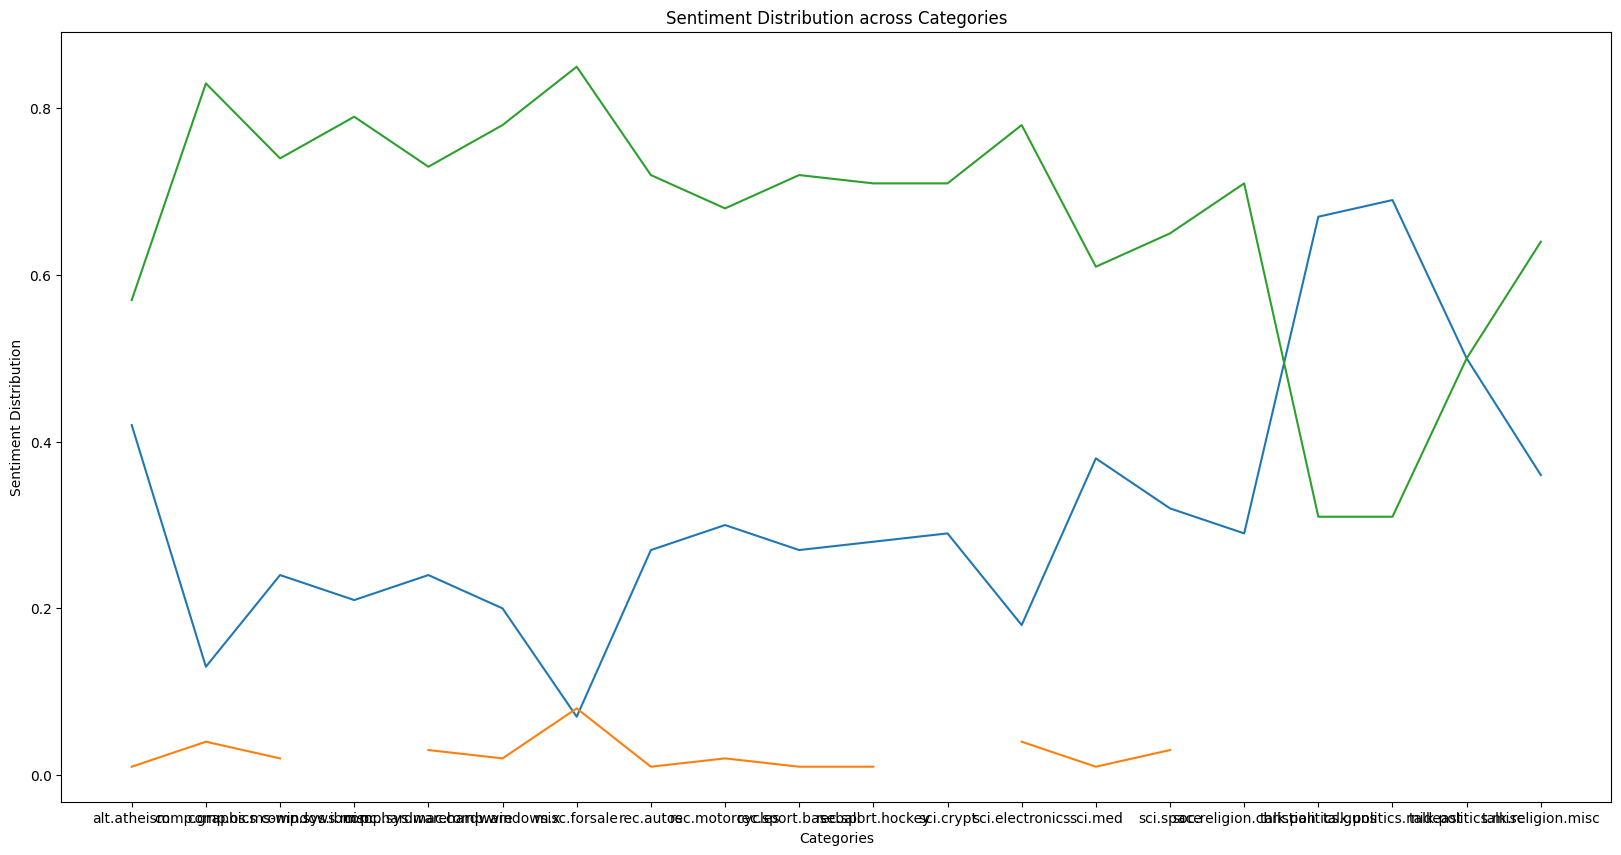

In [76]:

plt.figure(figsize=(20,10))
plt.plot(sentiment_dist)
plt.xlabel('Categories')
plt.ylabel('Sentiment Distribution')
plt.title("Sentiment Distribution across Categories")

## 4. Evaluation

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [78]:
y_pred = pipeline.predict(x_test)

In [79]:
y_pred

array(['comp os ms windows misc', 'sci med', 'sci med', 'sci med',
       'rec sport hockey', 'sci med', 'sci med', 'rec sport hockey',
       'sci med', 'sci med', 'sci med', 'sci med', 'sci med', 'sci med',
       'sci med', 'sci med', 'sci med', 'sci med', 'sci med', 'sci med',
       'sci med', 'sci med', 'sci med', 'sci med', 'sci med', 'sci med',
       'sci med', 'sci med', 'sci med', 'sci med', 'sci med',
       'rec sport hockey', 'rec autos', 'sci med', 'sci med', 'sci med',
       'sci med', 'sci med', 'sci med', 'sci med', 'sci med', 'sci med',
       'sci med', 'sci med', 'sci med', 'sci med', 'sci med', 'sci med',
       'sci med', 'sci med', 'sci med', 'sci med', 'sci med', 'sci med',
       'sci med', 'sci med', 'sci med', 'comp os ms windows misc',
       'sci med', 'sci med', 'sci med', 'sci med', 'sci med',
       'rec sport hockey', 'sci med', 'sci med', 'sci med', 'sci med',
       'sci med', 'sci med', 'sci med', 'sci med', 'sci med', 'sci med',
       'sci med', 

In [80]:
# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display the classification report
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print("\nClassification Report:\n", report)

Accuracy: 0.03
Precision: 0.00
Recall: 0.03
F1-score: 0.00

Classification Report:
                           precision    recall  f1-score   support

             alt atheism       0.00      0.00      0.00        25
           comp graphics       0.00      0.00      0.00        18
 comp os ms windows misc       0.00      0.00      0.00        23
comp sys ibm pc hardware       0.00      0.00      0.00        24
   comp sys mac hardware       0.00      0.00      0.00        18
          comp windows x       0.00      0.00      0.00        18
            misc forsale       0.00      0.00      0.00        21
               rec autos       0.00      0.00      0.00        14
         rec motorcycles       0.00      0.00      0.00        25
      rec sport baseball       0.00      0.00      0.00        19
        rec sport hockey       0.07      0.08      0.08        12
               sci crypt       0.00      0.00      0.00        26
         sci electronics       0.00      0.00      0.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m